<div dir=rtl align=center>

<img src='https://upload.wikimedia.org/wikipedia/fa/thumb/a/a9/Sharif_logo.svg/626px-Sharif_logo.svg.png?20110526112825' alt="SUT logo" width=200 height=200 align=center  >
<br>
<font face="B Yekan">
<font color=0F5298 size=7>
یادگیری ماشین<br>
<font color=2565AE size=5>
دانشکده مهندسی صنایع<br>
<font color=2565AE size=4>
دکتر مهدی شریف زاده <br>
<font  size=4>

امیرحسین محمودی
 <br>
بهار 1402<br>

<font color=3C99D size=5>
تمرین عملی 2
<br>
سوال 2
- تشخیص هرزنامه ها
<br>
200 نمره
    
    
____


### Full Name : Parsa Bakhtiari

### Student Number : 97104118

---


<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">
در این تمرین می خواهیم مدلی ایجاد کنیم تا پیام های هرز را از پیام های معمولی تشخیص دهیم.
داده های داده شده حاوی دو ستون هستند .یکی ستون متن پیام و دیگری برچسب پیام که Spam نشان دهنده هرز بودن پیام و ham نشان دهنده پاک بودن پیام است.
</div>

# Libraries

In [1]:
! pip install nltk

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [42]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk
# add what you want
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
import graphviz

# Load data

<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">
داده ها را در فرمت مناسب زبان فارسی بخوانید
</div>

In [3]:
# import csv
# df_base = pd.read_csv('emails.csv', encoding='utf-8',
#                       quoting=csv.QUOTE_NONE,
#                       error_bad_lines=False,
#                       sep=',')

df_base = pd.read_csv('emails.csv', encoding='utf-8')
df_base


,text,label
0,﻿ممنون آقا سامان.\nمن پارسال اصلا آزاد شرکت نک...,ham
1,﻿سلام آقای کریمی\nبالاخره آزمونارشد تموم شد من...,ham
2,﻿درود بر حاج وحیدی بنده بعنوان یک دکتری تاریخ ...,ham
3,﻿با سلام و احترام\nضمن تقدیر از مسولین محترم ...,ham
4,﻿با سلام اینجانب یک دستگاه خودرو پراید 131 با ...,ham
...,...,...
995,﻿\nبسمه تعالی\n\nسازمان زیباسازی شهرداری استان...,spam
996,﻿\n\nبه مناسبت فرا رسیدن میلاد دخت پیامبر گرام...,spam
997,﻿\nدرود هموطن من\n\n \n\nتست رایگان \n\n ...,spam
998,﻿\n\n *درج **لینک در 8700 وبلاگ\n *\n\n...,spam


# A. Exploratory Analysis (10 points)

<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">

در صورتی که داده شما شامل مقادیر خالی است آن ها را حذف کنید.

یک ستون دیگر به داده ها اضافه کنید و طول هر پیام را در آن درج کیند.

نمودار تعداد پیام های هرز و غیر هرز برحسب طول پیام را رسم کنید.
</div>

C:\Users\parsa\AppData\Local\Temp\ipykernel_15636\529363814.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['lenght'][index] = len(df_base['text'][index])


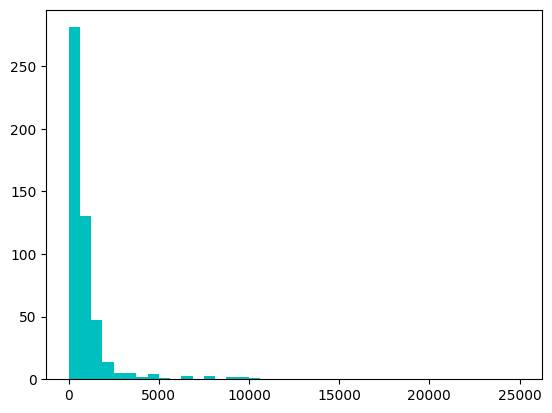

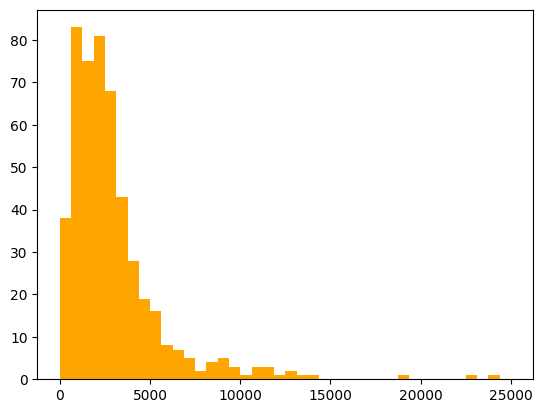

In [4]:
df_base.dropna()
df_base['lenght'] = np.nan
for index in range(df_base.shape[0]):
    df_base['lenght'][index] = len(df_base['text'][index])
plt.hist(df_base['lenght'][df_base['label'] == 'ham'], bins=40, alpha=1, color='c', range=[0,25000])
plt.show()
plt.hist(df_base['lenght'][df_base['label'] == 'spam'], bins=40, alpha=1, color='orange', range=[0,25000])
plt.show()

# B. Text Cleaning (30 points)

<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">

حال نیاز است تا [واژه های پالایشی](https://fa.wikipedia.org/wiki/%D9%88%D8%A7%DA%98%D9%87_%D9%BE%D8%A7%D9%84%D8%A7%DB%8C%D8%B4%DB%8C_(%D9%BE%D8%B1%D8%AF%D8%A7%D8%B2%D8%B4_%D8%B2%D8%A8%D8%A7%D9%86_%D8%B7%D8%A8%DB%8C%D8%B9%DB%8C))
(stop words) 
را به همراه بعضی علامت ها از متن ها حذف کنیم.
برای حذف علائم می توانید از کتابخانه string  استفاده کنید.

 می توانید فهرست کلمات پالایشی انگلیسی 
 ( با استفاده از  کتابخانه NLTK) 
 همراه با 
  فهرست کلمات پالایشی زبان فارسی  که در پوشه تمرین قراره داده شده است 
([منبع و اطلاعات بیشتر](https://github.com/ziaa/Persian-stopwords-collection))
 استفاده کنید.

 تابع زیر را به شکلی تکمیل کنید که با گرفتن یک متن کلمات پالایشی و علائم را از متن حذف کند.
 
 حال این تابع را روی داده های خود اجرا کنید و نتیجه را در ستونی به نام text_new ذخیره کنید.


</div>

In [5]:
with open('stopwords.txt', mode='r', encoding='utf-8') as file:
    content = file.read()
stopwords_fa = content.split('\n')


In [6]:
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
import re
stopwords_eng = set(stopwords.words('english'))
stopwords_address = ['www', 'http', 'https']

df_base['text_new'] = ''

def text_process(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(f'[\u06F0-\u06F9]+', ' ', text)
    text = re.sub(f'[{string.punctuation}]', '', text)
    # text = re.sub(f'[{stopwords_address}]', '', text)
    text = ' '.join([word for word in text.split() if word not in stopwords_eng])
    text = ' '.join([word for word in text.split() if word not in stopwords_fa])
    return text
 
df_base['text_new'] = df_base['text'].apply(text_process)


df_base

[nltk_data] Error loading stopwords: <urlopen error [WinError 10053]
[nltk_data]     An established connection was aborted by the software
[nltk_data]     in your host machine>


,text,label,lenght,text_new
0,﻿ممنون آقا سامان.\nمن پارسال اصلا آزاد شرکت نک...,ham,146.0,ممنون سامان آزاد شرکت سراسری قبول نشدم میخواست...
1,﻿سلام آقای کریمی\nبالاخره آزمونارشد تموم شد من...,ham,347.0,سلام کریمی آزمونارشد تموم یکم راهنمایی خوام مج...
2,﻿درود بر حاج وحیدی بنده بعنوان یک دکتری تاریخ ...,ham,360.0,درود حاج وحیدی بنده بعنوان دکتری تاریخ دستی تا...
3,﻿با سلام و احترام\nضمن تقدیر از مسولین محترم ...,ham,330.0,سلام احترام تقدیر مسولین محترم سایت تابناک رسا...
4,﻿با سلام اینجانب یک دستگاه خودرو پراید 131 با ...,ham,290.0,سلام اینجانب دستگاه خودرو پراید 131 شماره درخو...
...,...,...,...,...
995,﻿\nبسمه تعالی\n\nسازمان زیباسازی شهرداری استان...,spam,756.0,بسمه تعالی سازمان زیباسازی شهرداری استان تهران...
996,﻿\n\nبه مناسبت فرا رسیدن میلاد دخت پیامبر گرام...,spam,779.0,مناسبت فرا رسیدن میلاد دخت پیامبر گرامی اسلام ...
997,﻿\nدرود هموطن من\n\n \n\nتست رایگان \n\n ...,spam,772.0,درود هموطن تست رایگان تحویل اکانت پرداخت افتتا...
998,﻿\n\n *درج **لینک در 8700 وبلاگ\n *\n\n...,spam,710.0,درج لینک 8700 وبلاگ درج لینک تبلیغات متنی صفحا...


# C. Word Cloud (30 points)

<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">
حال می خواهیم ابر کلمات هر دسته را رسم کنیم تا کلمات کلیدی هرزنامه ها را به صورت چشمی بررسی کنیم.

برای اینکار ابتدا با مفهوم [tokenization](https://en.wikipedia.org/wiki/Lexical_analysis#Tokenization) آشنا می شویم.
در واقع نیاز داریم تا جملات را به یک سری token (مفهومی شبیه به کلمه)
بشکنیم.

برای ساخت ابر کلمات نیاز است تا هر جمله راه به token هایی تبدیل کنیم.
سپس تمام token های پیام های هرز  را در یک رشته با فاصله کنار هم قرار دهیم.
همین کار را برای دسته پیام های پاک نیز انجام می دهیم.
حال با استفاده از این رشته ها می توان ابر کلمات هر دسته را ایجاد کرد.
</div>

<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">
جهت تبدیل جملات به token  میتوان از ابزار های کتابخانه NLTK استفاده کرد.

اما ما برای بالا بردن دقت کار از کتابخانه [هضم](https://www.roshan-ai.ir/hazm/docs/)
 که برای زبان فارسی توسعه داده شده است استفاده می کنیم.
</div>

In [7]:
! pip install hazm

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [8]:
from __future__ import unicode_literals
import hazm
from hazm import word_tokenize
# Import nltk packages and Punkt Tokenizer Models
import nltk
nltk.download("punkt")
import warnings
warnings.filterwarnings('ignore')
from nltk.tokenize import sent_tokenize, word_tokenize

[nltk_data] Error loading punkt: <urlopen error [Errno 2] No such file
[nltk_data]     or directory>


In [9]:
#TODO

<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">
برای رسم ابر کلمات به زبان انگلیسی می توان از کتابخانه WordCloud استفاده کرد.این کتابخانه از زبان فارسی پشتیبانی نمی کند

برای رسم ابر کلمات در زبان فارسی از کتابخانه  [WordCloud_fa](https://pypi.org/project/wordcloud-fa/)
استفاده می کنیم.
</div>


In [10]:
! pip install wordcloud-fa

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [11]:
from wordcloud_fa import WordCloudFa

<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">
ابر کلمات دو دسته هرز و غیر هرز را رسم کنید
</div>

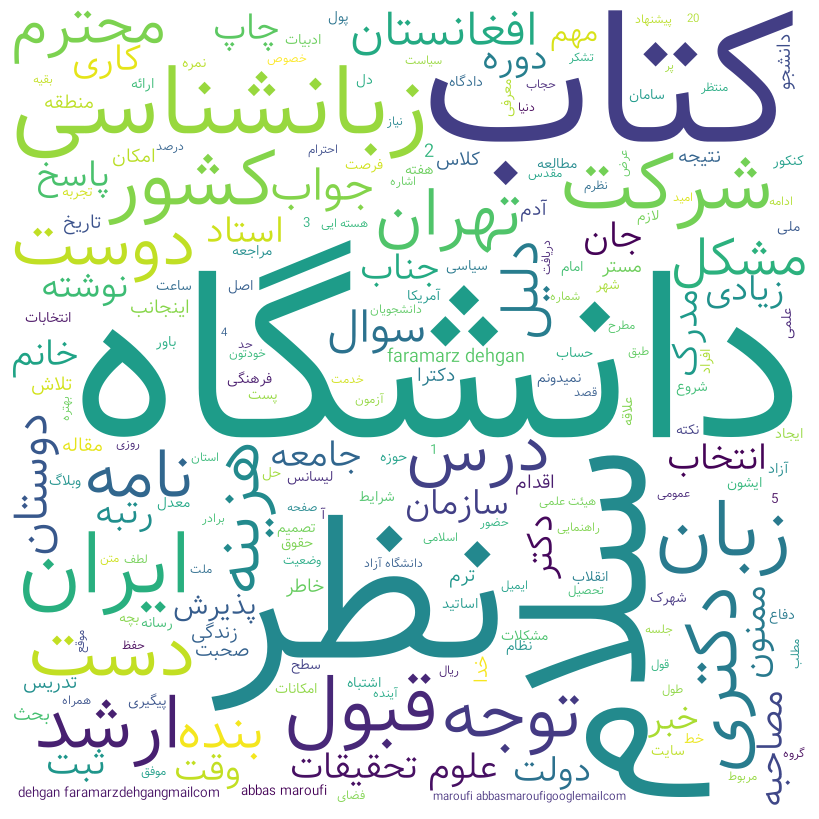

In [12]:
tokenized_dataset = [hazm.word_tokenize(string) for string in df_base['text_new'][df_base['label'] == 'ham']]
words = [word for sublist in tokenized_dataset for word in sublist]
text_string = " ".join(words)
wordcloud = WordCloudFa(width = 800, height = 800, 
                background_color ='white', 
                stopwords = [], 
                min_font_size = 10).generate(text_string)
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

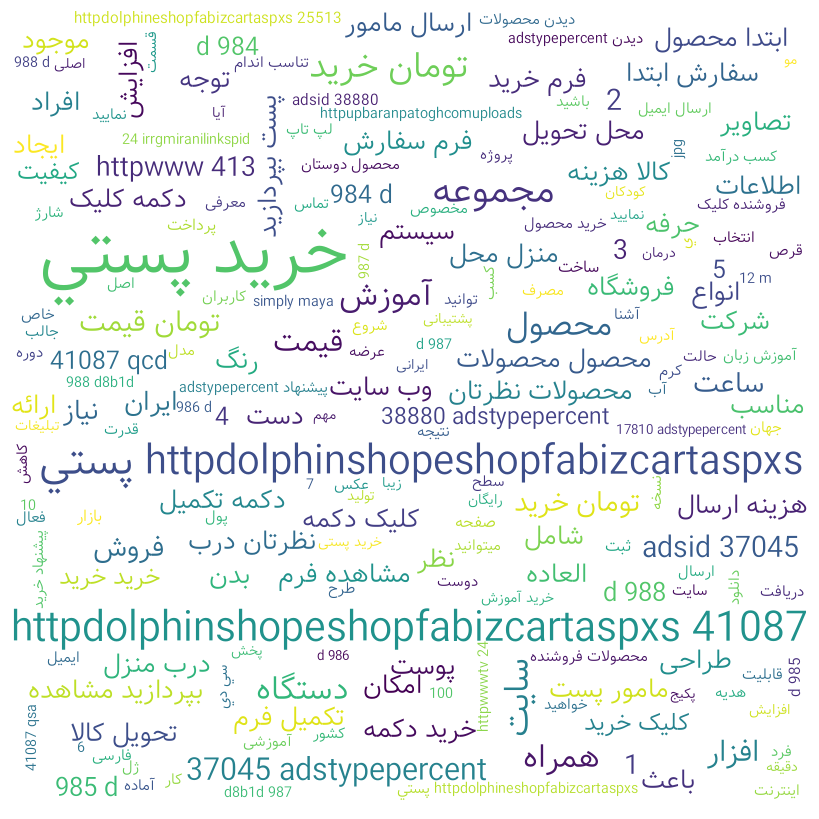

In [21]:
tokenized_dataset = [hazm.word_tokenize(string) for string in df_base['text_new'][df_base['label'] == 'spam']]
words = [word for sublist in tokenized_dataset for word in sublist]
text_string = " ".join(words)
wordcloud = WordCloudFa(width = 800, height = 800, 
                background_color ='white', 
                stopwords = [], 
                min_font_size = 10).generate(text_string)
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

# D. Vectorization (30 points)

<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">
برای استفاده از جملات برای یادگیری ماشین نیاز است تا آن ها را به شکل برداری تبدیل کنیم.برای این کار روش های مختلفی وجود دارد.


 ما در اینجا از روش  [فراوانی وزنی تی‌اف-آی‌دی‌اف](https://fa.wikipedia.org/wiki/%D9%81%D8%B1%D8%A7%D9%88%D8%A7%D9%86%DB%8C_%D9%88%D8%B2%D9%86%DB%8C_%D8%AA%DB%8C%E2%80%8C%D8%A7%D9%81-%D8%A2%DB%8C%E2%80%8C%D8%AF%DB%8C%E2%80%8C%D8%A7%D9%81)
  استفاده می کنیم.برای اینکار می توانید از [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) کتابخانه sklearn استفاده کنید.
  
  برای دریافت اسم فیچر ها می توانید از دستور get_feature_names_out روی تبدیل کننده بردار استفاده کنید.

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

text_new_list = df_base['text_new'].tolist()
Tfidf_vectorizer = TfidfVectorizer()
Tfidf_vectorizer.fit(text_new_list)
data_vector = Tfidf_vectorizer.transform(text_new_list)
feature_names = Tfidf_vectorizer.get_feature_names_out()
df_base['vector'] = data_vector.toarray().tolist()

# E. Data Preparation (10 points)

<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">
برای استفاده از داده ها نیاز است تا دسته هر داده را به شکل عددی ذخیره کنیم.

</div>


In [26]:
df_base['label_ordinal'] = df_base['label'].astype('category').cat.codes
df_base

,text,label,lenght,text_new,vector,label_ordinal
0,﻿ممنون آقا سامان.\nمن پارسال اصلا آزاد شرکت نک...,ham,146.0,ممنون سامان آزاد شرکت سراسری قبول نشدم میخواست...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
1,﻿سلام آقای کریمی\nبالاخره آزمونارشد تموم شد من...,ham,347.0,سلام کریمی آزمونارشد تموم یکم راهنمایی خوام مج...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
2,﻿درود بر حاج وحیدی بنده بعنوان یک دکتری تاریخ ...,ham,360.0,درود حاج وحیدی بنده بعنوان دکتری تاریخ دستی تا...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
3,﻿با سلام و احترام\nضمن تقدیر از مسولین محترم ...,ham,330.0,سلام احترام تقدیر مسولین محترم سایت تابناک رسا...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
4,﻿با سلام اینجانب یک دستگاه خودرو پراید 131 با ...,ham,290.0,سلام اینجانب دستگاه خودرو پراید 131 شماره درخو...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
...,...,...,...,...,...,...
995,﻿\nبسمه تعالی\n\nسازمان زیباسازی شهرداری استان...,spam,756.0,بسمه تعالی سازمان زیباسازی شهرداری استان تهران...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
996,﻿\n\nبه مناسبت فرا رسیدن میلاد دخت پیامبر گرام...,spam,779.0,مناسبت فرا رسیدن میلاد دخت پیامبر گرامی اسلام ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
997,﻿\nدرود هموطن من\n\n \n\nتست رایگان \n\n ...,spam,772.0,درود هموطن تست رایگان تحویل اکانت پرداخت افتتا...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
998,﻿\n\n *درج **لینک در 8700 وبلاگ\n *\n\n...,spam,710.0,درج لینک 8700 وبلاگ درج لینک تبلیغات متنی صفحا...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1


<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">
متغیر های  پیشبینی و هدف را ایجاد کرده و به شکل مناسب آن ها برای آموزش و تست جدا کنید.

In [37]:
X_train, X_test, y_train, y_test = train_test_split(df_base['vector'].tolist(), df_base['label_ordinal'].tolist(), test_size=0.3, random_state=42)

# F. Model Training (80 points)

<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">
با استفاده از روش هایی که تا اینجا یاد گرفتید(SVM , Decision Tree, Random Forest) مدل خود را آموزش دهید و معیار های آن ها را با هم مقایسه کنید.

برای روش SVM ماتریس در هم ریختگی را رسم کنید.

برای روش درخت تصمیم نمودار درخت خود را در یک فایل pdf خروجی بگیرید.
</div>

In [38]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_score
def results(y_test, y_pred):
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print('accuracy_score:', accuracy_score(y_test, y_pred))
    print('precision_score:', precision_score(y_test, y_pred))
    print('roc_auc_score:', roc_auc_score(y_test, y_pred))

In [41]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
confusion_matrix(y_test, svm.predict(X_test))


array([[147,   3],
       [  5, 145]], dtype=int64)

In [43]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
data = export_graphviz(decision_tree, out_file=None, feature_names=feature_names, class_names=['0', '1'], filled=True)
graph = graphviz.Source(data)
graph.format = 'pdf'
graph.render('decision_tree_diagram')

'decision_tree_diagram.pdf'

In [44]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [46]:
print('\n\nSVM results:')
results(y_test, svm.predict(X_test))
print('\n\nDecision Tree results:')
results(y_test, decision_tree.predict(X_test))
print('\n\nRandom forest results:')
results(y_test, random_forest.predict(X_test))



SVM results:
[[147   3]
 [  5 145]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       150
           1       0.98      0.97      0.97       150

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300

accuracy_score: 0.9733333333333334
precision_score: 0.9797297297297297
roc_auc_score: 0.9733333333333334


Decision Tree results:
[[129  21]
 [ 18 132]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       150
           1       0.86      0.88      0.87       150

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300

accuracy_score: 0.87
precision_score: 0.8627450980392157
roc_auc_score: 0.8699999999999999


Random forest results:
[[142   8]
 [ 14 136]]
              pr

# G. Predictor function (10 points)

<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">
یک تابع ایجاد کنید که با دریافت مدل ، تبدیل کننده برداری و یک متن به شما بگوید که آیا این پیام هرز است یا خیر.

تابع خود را با ورودی های داده شده تست کنید.
</div>

In [51]:
def isSpam(model,vectorizer,texts):
    texts = [(text_process(x)) for x in texts]
    text_vec = vectorizer.transform(texts)
    text_predictions = model.predict(text_vec.toarray())
    for prediction in text_predictions:
        if prediction == 0:
            print('ham')
        else:
            print('spam')
    return


In [19]:
samples=['سلام محمود خوبی؟نگران شدم','این محصول را ازینجا خریدپستی کنید']

In [54]:
isSpam(decision_tree, Tfidf_vectorizer, samples)

ham
ham
